In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [7]:
img_height, img_width = 256, 256
batch_size = 32
num_classes = 4

In [8]:
train_dir = r'C:\Users\world\Downloads\Fruits'
test_dir = r'C:\Users\world\Downloads\FruitsTest'


In [71]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [73]:
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [75]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 849 images belonging to 4 classes.


In [77]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 9 images belonging to 4 classes.


In [79]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [81]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [83]:
history = model.fit(train_generator, 
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2943 - loss: 3.5771 - val_accuracy: 0.3333 - val_loss: 1.1870
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3125 - loss: 1.2221 - val_accuracy: 0.5556 - val_loss: 1.1528
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5142 - loss: 1.0459 - val_accuracy: 0.3333 - val_loss: 1.1407
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6562 - loss: 0.7794 - val_accuracy: 0.4444 - val_loss: 1.0362
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6951 - loss: 0.8086 - val_accuracy: 0.4444 - val_loss: 1.0354
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 0.8221 - val_accuracy: 0.4444 - val_loss: 0.9612
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6758 - loss: 0.7472 - val_accuracy: 0.6667 - val_loss: 0.9293
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 1.0753 - val_accuracy: 0.5556 - val_loss:

In [85]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5556 - loss: 0.8148
Test accuracy: 0.56


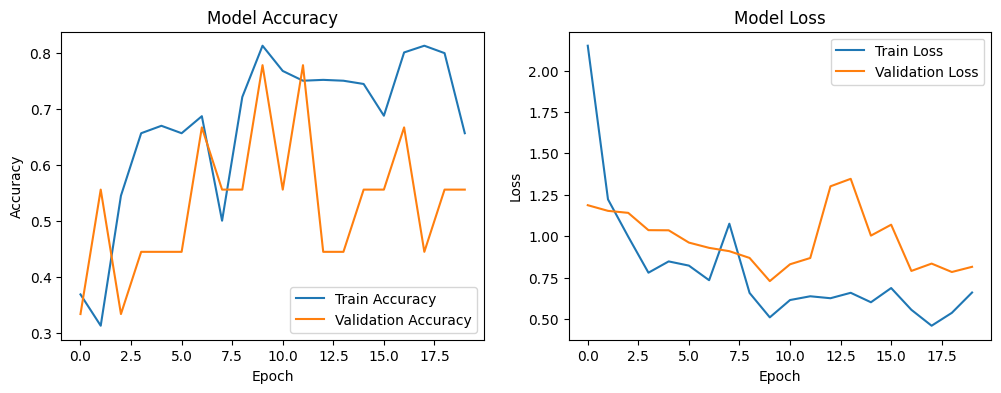

In [87]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)

Found 849 images belonging to 4 classes.
Found 9 images belonging to 4 classes.
Epoch 1/50


C:\Users\world\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\world\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 225s 8s/step - accuracy: 0.2647 - loss: 1.5086 - val_accuracy: 0.5556 - val_loss: 1.2082 - learning_rate: 0.0010
Epoch 2/50
 1/26 ━━━━━━━━━━━━━━━━━━━━ 3:27 8s/step - accuracy: 0.4688 - loss: 1.2734

C:\Users\world\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.4688 - loss: 1.2734 - val_accuracy: 0.6667 - val_loss: 1.2000 - learning_rate: 0.0010
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 223s 8s/step - accuracy: 0.5529 - loss: 1.1032 - val_accuracy: 0.7778 - val_loss: 1.0694 - learning_rate: 0.0010
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.5625 - loss: 0.9953 - val_accuracy: 0.6667 - val_loss: 1.0633 - learning_rate: 0.0010
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 222s 8s/step - accuracy: 0.6935 - loss: 0.9213 - val_accuracy: 0.6667 - val_loss: 1.0143 - learning_rate: 0.0010
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.6875 - loss: 0.8646 - val_accuracy: 0.6667 - val_loss: 0.9997 - learning_rate: 0.0010
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.6986 - loss: 0.8242 - val_accuracy: 0.5556 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.7188 - loss: 0.7372 - val_accurac

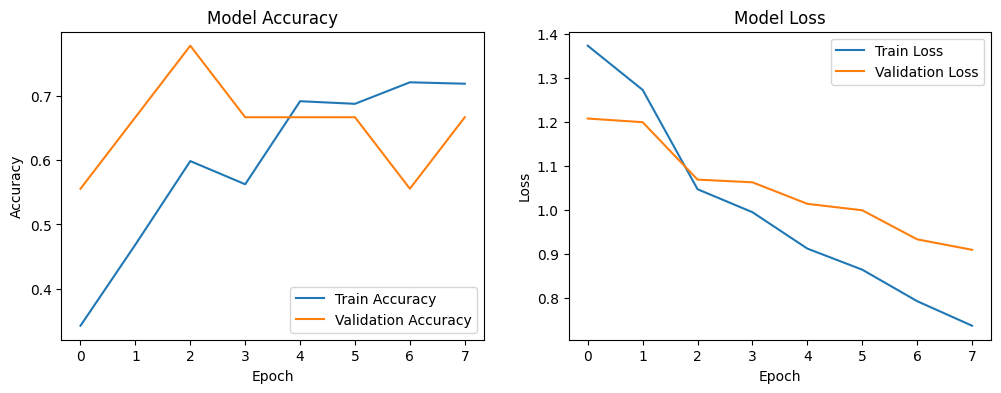

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Parameters
img_height, img_width = 256, 256
batch_size = 32
num_classes = 4
train_dir = r'C:\Users\world\Downloads\Fruits'
test_dir = r'C:\Users\world\Downloads\FruitsTest'

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Add vertical flipping
    brightness_range=[0.5, 1.5],  # Add brightness adjustment
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Model Definition with Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(train_generator, 
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the training history
plot_history(history)